In [1]:
import os
import numpy as np
import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results2(path, n_folds):
    result = []
    with gzip.open(  path ,'rb') as f:
        for i in range(n_folds):

            try:
                data = pkl.load(f)

                result.append( data ) 
            except EOFError:

                break
    
    return np.array(result)

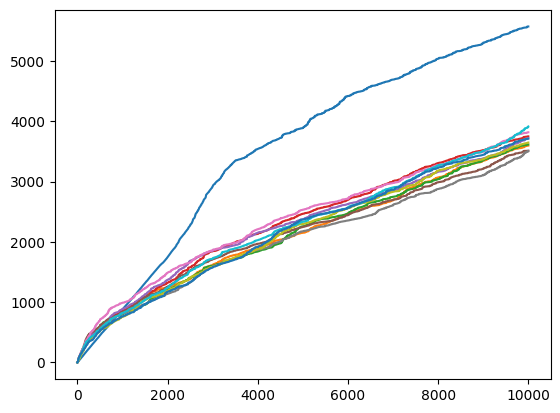

In [6]:
import matplotlib.pyplot as plt
n_folds = 12
horizon = 9999

context = 'MNIST'

direct = './results/'
path = os.path.join(direct, 'case3_{}_{}_{}_{}.pkl.gz'.format(context,horizon,n_folds,'EEneuralcbpside') )
result = loadall_results2(path, 20)
result = result[1:]
plt.plot(range(9999), result.T)


In [3]:

horizon = 9999
context = 'MNIST'


# colors = [ [0,255,255], [0,0,255], [0,128,0], [128,0,255], [0,0,0], [0,0,0] ]

# labels = [    'neuralcbpside', 'randneuralcbpside',  'margin' , 'cesa', 'ineural' , 'random'] 



# colors = [  [0,255,255], [0,0,255], [0,128,0], [128,0,255], [150,0,50], [0,0,0] ]
# labels = [   'EEneuralcbpside',  'randneuralcbpside', 'random', 'random2', 'ineural' ] 
# legend_labels = [ 'EEneuralcbpside', 'Randneuralcbpside', 'e-greedy1', 'e-greedy2', 'IneurAL' , ] 

material = { 'EEneuralcbpside':{'color':[255,0,0],'label': 'EEneuralcbpside'},
             'ineural':{'color':[0,0,255],'label':'IneurAL'},
             'random2':{'color':[204,0,204],'label':'e-greedy'}  }

            # 'random':{'color':[204,0,204],'label':'e-greedy'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,0],'label': 'Cesa'},

fig = go.Figure( )

final_regrets = []

for agent_name in material.keys():

    color, l_label = material[agent_name]['color'], material[agent_name]['label']

    r,g,b = color

    direct = './results/'
    if agent_name == 'EEneuralcbpside':
        n_folds = 12
    # elif agent_name == 'EEneuralcbpside':
    #     n_folds = 1
    else:
        n_folds = 10

    path = os.path.join(direct, 'case3_{}_{}_{}_{}.pkl.gz'.format(context,horizon,n_folds,agent_name) )
    result = loadall_results2(path, 12)
    result = result[1:]
    result = result.astype(np.float32)
    print(result)
    
    regret =  np.mean(result,0) 
    xcoords = np.arange(0,horizon,1).tolist()
    std =  np.std( result , 0 )
    upper_regret = regret + std

    # if agent_name == 'random2':
    #     fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'dot' ), mode='lines',  name=l_label,  showlegend=True )) 
    # else:
    fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'solid' ), mode='lines',  name=l_label,  showlegend=True )) 
    
    fig.add_trace(   go.Scatter( x=xcoords+xcoords[::-1], y=upper_regret.tolist()+regret.tolist()[::-1],  fill='toself', fillcolor='rgba({}, {}, {},0.2)'.format(r,g,b), 
                            line=dict(color='rgba(255,255,255,0)'),   hoverinfo="skip",  showlegend=False )   )

fig.update_layout(autosize=False,
                  xaxis_title="Sequence", yaxis_title="Regret and Standard Dev.",  margin=go.layout.Margin( l=0,   r=0,   b=0,    t=0, ),   
                  font=dict(size=20,),
                  legend= dict(yanchor="top",y=0.98,xanchor="left",x=0.1) )

# fig.update_yaxes( type="log" )
# fig.update_xaxes( type="log" )

fig.update_layout( yaxis=dict(range=[0, 10000] ) )

fig.show()
fig.write_image("./figures/case3.pdf" )

[[1.000e+00 2.000e+00 3.000e+00 ... 5.571e+03 5.571e+03 5.571e+03]
 [1.000e+00 2.000e+00 4.000e+00 ... 3.596e+03 3.596e+03 3.596e+03]
 [1.000e+00 2.000e+00 3.000e+00 ... 3.615e+03 3.615e+03 3.615e+03]
 ...
 [1.000e+00 1.000e+00 2.000e+00 ... 3.647e+03 3.647e+03 3.647e+03]
 [1.000e+00 2.000e+00 4.000e+00 ... 3.912e+03 3.913e+03 3.913e+03]
 [1.000e+00 2.000e+00 4.000e+00 ... 3.712e+03 3.712e+03 3.712e+03]]
[[1.000e+00 4.000e+00 5.000e+00 ... 6.840e+03 6.840e+03 6.840e+03]
 [1.000e+00 2.000e+00 4.000e+00 ... 6.733e+03 6.733e+03 6.733e+03]
 [1.000e+00 2.000e+00 2.000e+00 ... 6.738e+03 6.738e+03 6.740e+03]
 ...
 [2.000e+00 3.000e+00 4.000e+00 ... 6.863e+03 6.863e+03 6.863e+03]
 [1.000e+00 2.000e+00 1.200e+01 ... 6.316e+03 6.316e+03 6.316e+03]
 [2.000e+00 3.000e+00 4.000e+00 ... 6.703e+03 6.703e+03 6.705e+03]]
[[1.000e+00 2.000e+00 3.000e+00 ... 5.255e+03 5.256e+03 5.256e+03]
 [1.000e+00 2.000e+00 3.000e+00 ... 5.719e+03 5.719e+03 5.719e+03]
 [1.000e+00 2.000e+00 3.000e+00 ... 5.421e+03 5.42